In [173]:
# no show 

#### Data Exploration

In [285]:
import pandas as pd

In [286]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [287]:
df_bookings.shape

(134590, 12)

In [288]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [289]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [290]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<AxesSubplot:>

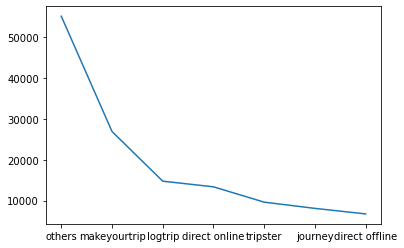

In [291]:
df_bookings.booking_platform.value_counts().plot()

<AxesSubplot:>

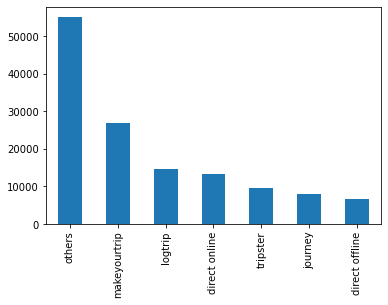

In [292]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [293]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [294]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [295]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")

In [296]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [297]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [298]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [299]:
df_hotels.shape

(25, 4)

In [300]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [301]:
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

In [302]:
df_hotels.city.value_counts().sort_values()

Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: city, dtype: int64

<AxesSubplot:>

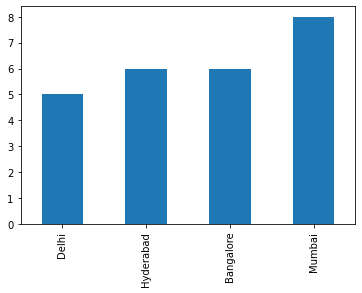

In [303]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

In [304]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [305]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [306]:
df_agg_bookings.property_id.value_counts().sort_values()

18561    368
17560    368
18560    368
16561    368
19560    368
17561    368
18563    368
16562    368
19563    368
17562    368
16560    368
19561    368
18562    368
17563    368
17564    368
18559    368
16558    368
19559    368
17558    368
18558    368
16559    368
19558    368
16563    368
19562    368
17559    368
Name: property_id, dtype: int64

In [307]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity].check_in_date

3        1-May-22
12       1-May-22
4136    11-Jun-22
6209     2-Jul-22
8522    25-Jul-22
9194    31-Jul-22
Name: check_in_date, dtype: object

In [308]:
df_agg_bookings["capacity"].sort_values()[::-1]

14       NaN
8        NaN
2027    50.0
5628    50.0
8728    50.0
        ... 
2281     3.0
4199     3.0
1980     3.0
5278     3.0
4175     3.0
Name: capacity, Length: 9200, dtype: float64

In [309]:
df_agg_bookings["capacity"].unique()

array([30., 19., 40., 26., nan, 34., 18., 31., 41., 32., 25., 15., 42.,
       33., 38., 27., 24., 36., 16., 23., 29., 50., 43., 22., 39., 44.,
       45., 21., 20.,  8.,  3.,  6.,  7., 10., 13.,  9., 17., 14.,  4.])

#### Data Cleaning

In [310]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [311]:
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [312]:
df_bookings.shape

(134590, 12)

In [313]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [314]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [315]:
df_bookings.shape

(134578, 12)

In [316]:
df_bookings.revenue_generated.min()

6500

In [317]:
df_bookings.revenue_generated.max()  # this is a error that much of money is not paid on one booking

28560000

In [318]:
avg , std = df_bookings.revenue_generated.mean() , df_bookings.revenue_generated.std()

In [319]:
avg , std

(15378.036937686695, 93040.15493143328)

In [320]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [321]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [322]:
df_bookings[df_bookings.revenue_generated<lower_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [323]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [324]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]

In [325]:
df_bookings.shape

(134573, 12)

In [326]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [327]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()

In [328]:
higher_limit

33479.3586618449

In [329]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [330]:
df_rooms   # here RT4 is Presidential, so 33479.3586618449(higher_limit) is not such a big amount in such hotels

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [331]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [332]:
23439.308444 + 3*9048.599076    # so here 45220.000000(max) is less than output (50585.105672000005), so there is no error

50585.105672000005

In [333]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [334]:
df_bookings.shape

(134573, 12)

In [335]:
# in the above statement we found that we have null values in ratings_given column, but we didn't handle that NA values
# because think in common sense, when we go to hotel we may or may not give ratings so it's not important to handle such errors in this case

In [336]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [337]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [338]:
df_agg_bookings.fillna({
    "capacity":df_agg_bookings.capacity.mean()
},inplace=True)

In [339]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [340]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [341]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings < df_agg_bookings.capacity]

In [342]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [343]:
df_agg_bookings.shape

(9082, 5)

#### Data Transformation

In [344]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [345]:
# occupancy_percentage = successful_bookings/capacity

In [346]:
df_agg_bookings["occ_pct"] = df_agg_bookings.successful_bookings/df_agg_bookings.capacity

In [347]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [348]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x : round(x*100,2))

In [349]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [350]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [351]:
# There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

# 1. Creating new columns
# 2. Normalization
# 3. Merging data
# 4. Aggregation

#### Insights Generation

#### 1. What is an average occupancy rate in each of the room categories?

In [352]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [353]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    57.78
RT2    57.75
RT3    57.60
RT4    58.02
Name: occ_pct, dtype: float64

In [354]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [355]:
df = pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")

In [356]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [357]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           57.75
Premium         57.60
Presidential    58.02
Standard        57.78
Name: occ_pct, dtype: float64

In [358]:
df.drop("room_id",axis=1,inplace=True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


#### 2. Print average occupancy rate per city

In [359]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [360]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


In [361]:
df = pd.merge(df_hotels,df,on="property_id")

In [362]:
df.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard
2,16558,Atliq Grands,Luxury,Delhi,3-May-22,RT1,14,19.0,73.68,Standard
3,16558,Atliq Grands,Luxury,Delhi,4-May-22,RT1,13,19.0,68.42,Standard
4,16558,Atliq Grands,Luxury,Delhi,5-May-22,RT1,12,19.0,63.16,Standard


In [363]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.033283
Delhi        60.629588
Hyderabad    57.795562
Mumbai       57.343392
Name: occ_pct, dtype: float64

#### 3. When was the occupancy better? Weekday or Weekend?

In [364]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [365]:
df.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard
2,16558,Atliq Grands,Luxury,Delhi,3-May-22,RT1,14,19.0,73.68,Standard
3,16558,Atliq Grands,Luxury,Delhi,4-May-22,RT1,13,19.0,68.42,Standard
4,16558,Atliq Grands,Luxury,Delhi,5-May-22,RT1,12,19.0,63.16,Standard


In [366]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday


In [367]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.86
weekend     71.33
Name: occ_pct, dtype: float64

#### 4. In the month of June, what is the occupancy for different cities

In [368]:
df.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday
3,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.67,Presidential,10-May-22,May 22,W 20,weekeday
4,16559,Atliq Exotica,Luxury,Mumbai,10-May-22,RT1,18,30.0,60.00,Standard,10-May-22,May 22,W 20,weekeday


In [369]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
2177,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT1,11,19.0,57.89,Standard,10-Jun-22,Jun 22,W 24,weekeday
2178,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT2,16,22.0,72.73,Elite,10-Jun-22,Jun 22,W 24,weekeday
2179,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT3,6,8.0,75.00,Premium,10-Jun-22,Jun 22,W 24,weekeday
2180,16559,Atliq Exotica,Luxury,Mumbai,10-Jun-22,RT1,20,30.0,66.67,Standard,10-Jun-22,Jun 22,W 24,weekeday


In [370]:
g = df_june_22.groupby("city")["occ_pct"]

In [371]:
for key , data in g:
    print("city: ",key)
    print("occ_pct: ",data)
    print()

city:  Bangalore
occ_pct:  2248    37.50
2249    43.59
2250    47.62
2251    42.86
2252    50.00
        ...  
4241    57.14
4242    50.00
4243    51.11
4244    44.83
4245    50.00
Name: occ_pct, Length: 498, dtype: float64

city:  Delhi
occ_pct:  2177    57.89
2178    72.73
2179    75.00
2184    47.06
2185    50.00
        ...  
4169    66.67
4170    65.85
4171    57.89
4172    70.00
4173    66.67
Name: occ_pct, Length: 411, dtype: float64

city:  Hyderabad
occ_pct:  2224    46.67
2225    56.67
2226    53.85
2227    50.00
2228    45.24
        ...  
4217    60.00
4218    51.85
4219    48.28
4220    47.83
4221    55.56
Name: occ_pct, Length: 501, dtype: float64

city:  Mumbai
occ_pct:  2180    66.67
2181    63.41
2182    62.50
2183    61.11
2200    47.37
        ...  
4197    57.89
4246    37.50
4247    45.00
4248    41.67
4249    41.18
Name: occ_pct, Length: 663, dtype: float64



In [372]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.65
Hyderabad    58.21
Mumbai       57.82
Bangalore    56.00
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='city'>

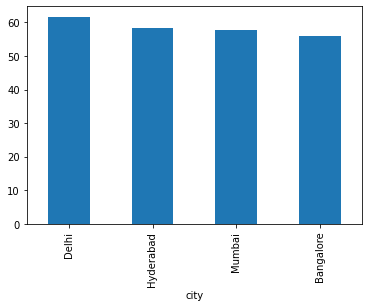

In [373]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

#### 5. We got new data for the month of august. Append that to existing data

In [374]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [375]:
df_august = pd.read_csv("new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [376]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [377]:
df.columns

Index(['property_id', 'property_name', 'category', 'city', 'check_in_date',
       'room_category', 'successful_bookings', 'capacity', 'occ_pct',
       'room_class', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [378]:
df_august.shape

(7, 13)

In [379]:
df.shape

(6428, 14)

In [380]:
latest_df = pd.concat([df,df_august],ignore_index=True,axis=0)

In [381]:
latest_df.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type,occ%
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday,NaN
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday,NaN
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday,NaN
3,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.67,Presidential,10-May-22,May 22,W 20,weekeday,NaN
4,16559,Atliq Exotica,Luxury,Mumbai,10-May-22,RT1,18,30.0,60.00,Standard,10-May-22,May 22,W 20,weekeday,NaN


In [382]:
latest_df.shape

(6435, 15)

#### 6. Print revenue realized per city

In [383]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [384]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [385]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [386]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

#### 7. Print month by month revenue

In [387]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [388]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [389]:
pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [390]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [391]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [392]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.info()  # now the data type of date is changed to datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [393]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [394]:
df_bookings_all = pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date") # now this work

df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [395]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

#### Exercise-1. Print revenue realized per hotel type

In [396]:
df_bookings_all.groupby("category")["revenue_realized"].sum()

category
Business    451950715
Luxury      723557067
Name: revenue_realized, dtype: int64

In [397]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [398]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [399]:
df_bookings_all = pd.merge(df_bookings_all,df_rooms,left_on="room_category",right_on="room_id")

In [400]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type,room_id,room_class
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday,RT1,Standard


In [401]:
df_bookings_all.groupby("room_class")["revenue_realized"].sum()

room_class
Elite           385138296
Premium         318622920
Presidential    258867172
Standard        212879394
Name: revenue_realized, dtype: int64

#### Exercise-2 Print average rating per city

In [402]:
df_bookings_all.groupby("city")["ratings_given"].mean()

city
Bangalore    3.403911
Delhi        3.775088
Hyderabad    3.664286
Mumbai       3.644350
Name: ratings_given, dtype: float64

#### Exercise-3 Print a pie chart of revenue realized per booking platform

<AxesSubplot:ylabel='revenue_realized'>

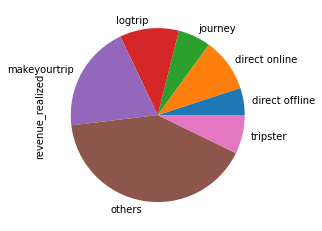

In [407]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")